### Convolution(합성곱) 필터를 사용한 엣지(Edge) 찾기

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

In [ ]:
def path_to_image(img_path, gray=False):
  f = open(img_path, 'rb')
  image_bytes = f.read()

  # Convert the image data to a NumPy array
  image = np.frombuffer(image_bytes, dtype=np.uint8)

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

In [ ]:
def filtered_image(image, filter, output_size):
  filtered_img = np.zeros((output_size, output_size))
  filter_size = filter.shape[0]

  for i in range(output_size):
    for j in range(output_size):
      multiply_values = image[i:(i + filter_size), j:(j + filter_size)] * filter
      sum_value = np.sum(multiply_values)

      if(sum_value > 255):
        sum_value = 255

      filtered_img[i, j] = sum_value
  return filtered_img

image.shape: (512, 512)


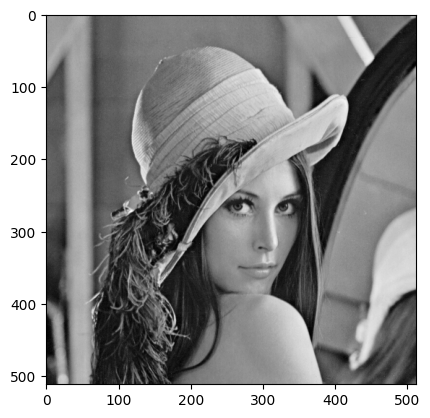

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png"
image = url_to_image(img_url, gray=True)
print("image.shape:", image.shape)
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
img_path = "./lenna.png"
image = path_to_image(img_path, gray=True)
print("image.shape:", image.shape)
plt.imshow(image, cmap='gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './lenna.png'

output size: 510


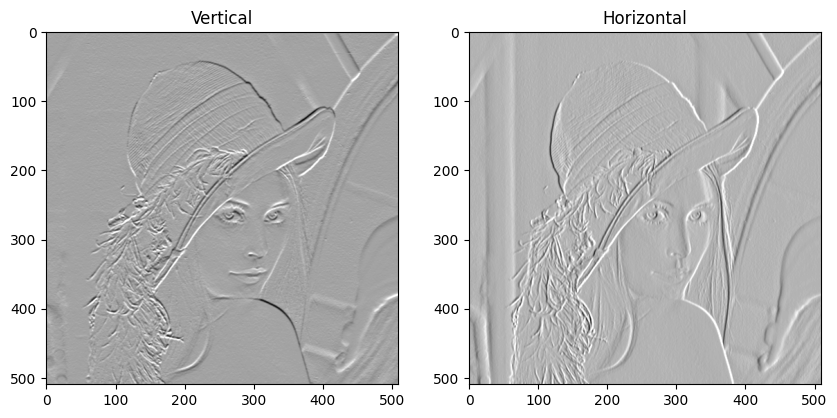

In [ ]:
vertical_filter = np.array([[1., 2., 1.],
                            [0., 0., 0.],
                            [-1., -2., -1.]])

horizontal_filter = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

output_size = int((image.shape[0] -3) / 1 + 1)
print("output size:", output_size)

vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.title("Vertical")
plt.imshow(vertical_filtered, cmap='gray')
plt.subplot(1,2,2)
plt.title("Horizontal")
plt.imshow(horizontal_filtered, cmap='gray')
plt.show()




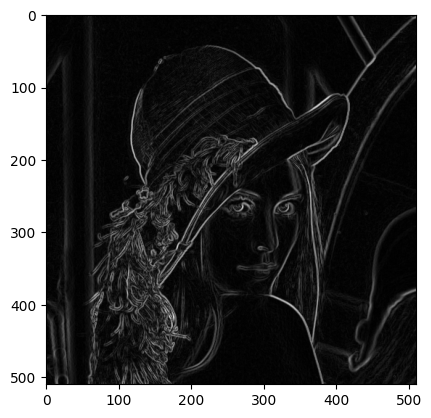

In [ ]:
sobel_img = np.sqrt(np.square(horizontal_filtered) + np.square(vertical_filtered))

plt.imshow(sobel_img, cmap='gray')